In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/income_evaluation.csv",skipinitialspace=True)

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [3]:
dataset.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

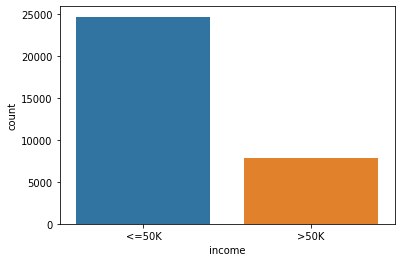

In [4]:
plt.figure(facecolor='white')
sns.countplot(x=dataset["income"],label="income distrubution")

In [5]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


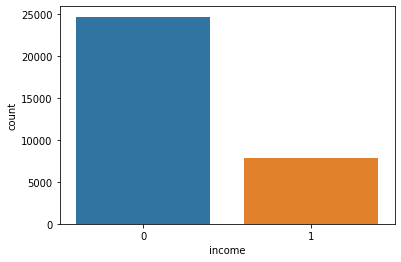

In [6]:
plt.figure(facecolor='white')
sns.countplot(x=dataset["income"],label="income distrubution")

In [7]:
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native-country"] = dataset["native-country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital-status"] = dataset["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital-status"] = dataset["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital-status"] = dataset["marital-status"].map({"Married":1, "Single":0})
dataset["marital-status"] = dataset["marital-status"].astype(int)

In [9]:
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','marital-status', 'sex']

# Identify Categorical features
cat_features = ['education', 'relationship', 'race', 'native-country']

In [10]:
train, test = train_test_split(dataset, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

20838 train examples
5210 validation examples
6513 test examples


In [11]:
feature_columns = []

# numeric cols
for header in numeric_features:
  feature_columns.append(feature_column.numeric_column(header))

feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital-gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital-loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='hours-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='marital-status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [12]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [13]:
dataset.drop(labels=["workclass","occupation"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education  education-num  marital-status   relationship  \
0   39   77516  Bachelors             13               0  Not-in-family   
1   50   83311  Bachelors             13               1        Husband   
2   38  215646    HS-grad              9               0  Not-in-family   
3   53  234721       11th              7               1        Husband   
4   28  338409  Bachelors             13               1           Wife   

    race  sex  capital-gain  capital-loss  hours-per-week native-country  \
0  White    0          2174             0              40  United-States   
1  White    0             0             0              13  United-States   
2  White    0             0             0              40  United-States   
3  Black    0             0             0              40  United-States   
4  Black    1             0             0              40           Cuba   

   income  
0       0  
1       0  
2       0  
3       0  
4   

In [14]:
for feature in cat_features:
    l = dataset[feature].unique()
#     print(l)
    f = feature_column.categorical_column_with_vocabulary_list(feature,l)
    one_hot = feature_column.indicator_column(f)
    feature_columns.append(one_hot)
    
print(feature_columns)


[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital-gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital-loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='hours-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='marital-status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='education', vocabulary_list=('Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm

In [15]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('income')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [16]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [17]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [18]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [20]:
model.fit(train_ds,validation_data=val_ds,epochs=25)

Epoch 1/25
652/652 [==============================] - 4s 4ms/step - loss: 446.8305 - accuracy: 0.6746 - val_loss: 544.5291 - val_accuracy: 0.7835
Epoch 2/25
652/652 [==============================] - 2s 3ms/step - loss: 210.7941 - accuracy: 0.6842 - val_loss: 39.5676 - val_accuracy: 0.7793
Epoch 3/25
652/652 [==============================] - 2s 3ms/step - loss: 140.8392 - accuracy: 0.6827 - val_loss: 312.6640 - val_accuracy: 0.2374
Epoch 4/25
652/652 [==============================] - 2s 3ms/step - loss: 99.0538 - accuracy: 0.6858 - val_loss: 206.0380 - val_accuracy: 0.7752
Epoch 5/25
652/652 [==============================] - 2s 3ms/step - loss: 79.6295 - accuracy: 0.6906 - val_loss: 34.9598 - val_accuracy: 0.7910
Epoch 6/25
652/652 [==============================] - 2s 3ms/step - loss: 63.2277 - accuracy: 0.6833 - val_loss: 122.2656 - val_accuracy: 0.7770
Epoch 7/25
652/652 [==============================] - 2s 3ms/step - loss: 42.2820 - accuracy: 0.6896 - val_loss: 16.3426 - val_ac

In [21]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)


204/204 [==============================] - 1s 3ms/step - loss: 0.8158 - accuracy: 0.7923
Accuracy 0.7922616600990295
